In [2]:
import pandas as pd

nasal_path = '../Data/Cohorts/Hopkins/Hopkins Flu Positive - Nasal Wash.xlsx'
plasma_path = '../Data/Cohorts/Hopkins/Hopkins Flu Positive - Plasma.xlsx'
nasal_df = pd.read_excel(nasal_path)
plasma_df = pd.read_excel(plasma_path)

AttributeError: 'Series' object has no attribute 'iteritems'

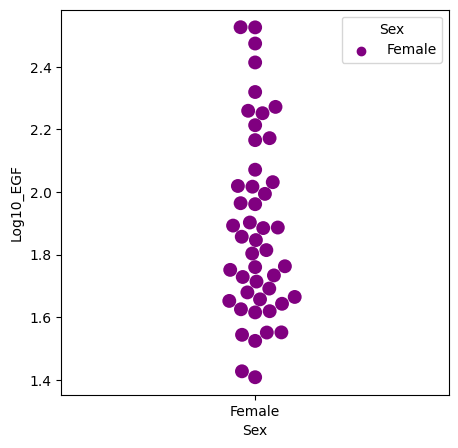

In [3]:
import os
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
import numpy as np

def plot_cytokine_by_category(df, cytokine_name, category, dataset_name):
    # Create a directory for the dataset and category if it doesn't exist
    directory = f'../Data/Cohorts/Hopkins/Cytokines/{dataset_name}/{category}/'
    os.makedirs(directory, exist_ok=True)

    # Filter data for the specific cytokine
    cytokine_data = df[['Sex', 'Flu.Type', cytokine_name]].dropna()

    # Replace 0 with NaN for log transformation
    cytokine_data[cytokine_name].replace(0, np.nan, inplace=True)
    cytokine_data = cytokine_data.dropna(subset=[cytokine_name])
    cytokine_data[f'Log10_{cytokine_name}'] = np.log10(cytokine_data[cytokine_name])

    # Plotting by category
    if category in ['Sex', 'Flu.Type']:
        unique_categories = cytokine_data[category].unique()
        for cat in unique_categories:
            cat_data = cytokine_data[cytokine_data[category] == cat]

            # Create the plot
            plt.figure(figsize=(5, 5))
            sns.swarmplot(x=category, y=f'Log10_{cytokine_name}', data=cat_data, size=10, edgecolor='black', 
                          palette={'Male': 'green', 'Female': 'purple'}, hue='Sex', zorder=1)

            # Calculate mean and standard deviation for each sex
            means = cat_data.groupby('Sex')[f'Log10_{cytokine_name}'].mean()
            stds = cat_data.groupby('Sex')[f'Log10_{cytokine_name}'].std()

            for i, (sex, mean) in enumerate(means.iteritems()):
                std = stds[sex]
                plt.errorbar(i, mean, yerr=std, fmt='none', color='black', capsize=10, elinewidth=2, capthick=2, zorder=2)
                plt.hlines(mean, xmin=i-0.4, xmax=i+0.4, colors='black', linestyles='solid', zorder=2)

            # T-test and p-value (if both sexes are present)
            if len(means) == 2:
                male_data = cat_data[cat_data['Sex'] == 'Male'][f'Log10_{cytokine_name}']
                female_data = cat_data[cat_data['Sex'] == 'Female'][f'Log10_{cytokine_name}']
                t_stat, p_value = ttest_ind(male_data, female_data)
                significance = "*" if p_value < 0.05 else ""
                anchored_text = AnchoredText(f'p = {p_value:.2e} {significance}', loc='upper center')
                plt.gca().add_artist(anchored_text)

            # Setting labels and title
            plt.ylabel(f'Log10({cytokine_name})')
            plt.title(f'{cytokine_name} Expression by {category} - {cat}')

            # Styling
            plt.gca().spines['top'].set_visible(False)
            plt.gca().spines['right'].set_visible(False)
            plt.savefig(f'{directory}/{cytokine_name}_{cat}.png')
            plt.close()

    elif category == 'Combined':
        # Handling the combined category
        pass  # Placeholder for combined category logic

# Testing the function with a few cytokines from the Nasal Wash dataset
test_cytokines = ['EGF', 'FGF2']
for cytokine in test_cytokines:
    plot_cytokine_by_category(nasal_df, cytokine, 'Sex', 'NasalWash')


C:\Users\jorda\AppData\Local\Temp\ipykernel_38268\987891568.py:23: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Combined', y=f'Log10_{cytokine_name}', data=cytokine_data, size=10, edgecolor='black',


AttributeError: 'Series' object has no attribute 'iteritems'

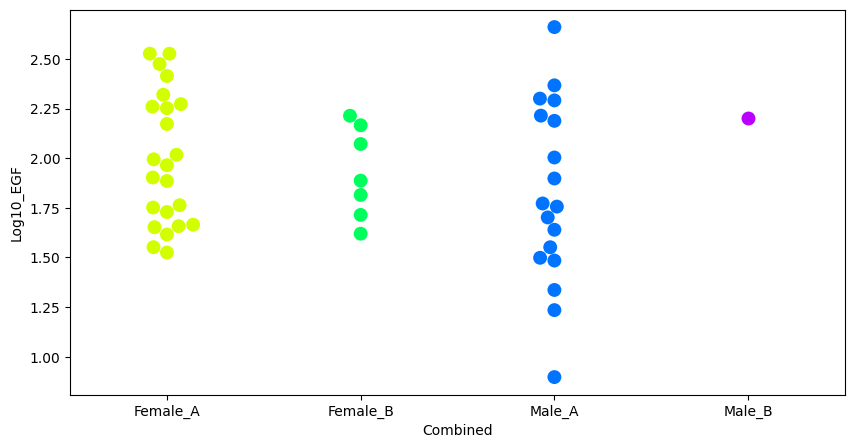

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_cytokine_by_combined_category(df, cytokine_name):
    """
    Function to plot cytokine data by a combined category of 'Sex' and 'Flu.Type'.
    """
    # Filter data for the specific cytokine
    cytokine_data = df[['Sex', 'Flu.Type', cytokine_name]].dropna()

    # Replace 0 with NaN for log transformation
    cytokine_data[cytokine_name].replace(0, np.nan, inplace=True)
    cytokine_data = cytokine_data.dropna(subset=[cytokine_name])
    cytokine_data[f'Log10_{cytokine_name}'] = np.log10(cytokine_data[cytokine_name])

    # Create a combined category
    cytokine_data['Combined'] = cytokine_data['Sex'] + '_' + cytokine_data['Flu.Type']

    # Create the plot
    plt.figure(figsize=(10, 5))
    sns.swarmplot(x='Combined', y=f'Log10_{cytokine_name}', data=cytokine_data, size=10, edgecolor='black',
                  palette=sns.color_palette("hsv", len(cytokine_data['Combined'].unique())), zorder=1)

    # Calculate mean and standard deviation for each combined category
    means = cytokine_data.groupby('Combined')[f'Log10_{cytokine_name}'].mean()
    stds = cytokine_data.groupby('Combined')[f'Log10_{cytokine_name}'].std()

    for i, (category, mean) in enumerate(means.iteritems()):
        std = stds[category]
        plt.errorbar(i, mean, yerr=std, fmt='none', color='black', capsize=10, elinewidth=2, capthick=2, zorder=2)
        plt.hlines(mean, xmin=i-0.4, xmax=i+0.4, colors='black', linestyles='solid', zorder=2)

    # Setting labels and title
    plt.ylabel(f'Log10({cytokine_name})')
    plt.title(f'{cytokine_name} Expression by Combined Category')

    # Styling
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

# Test the function with the 'Nasal Wash' dataset
# Note: For demonstration purposes, only a subset of the data is used.
test_cytokine = 'EGF'
plot_cytokine_by_combined_category(nasal_df.head(50), test_cytokine)
# The plot will be displayed directly here for verification purposes

